In [0]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from google.colab import drive, files
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.models import load_model 
import matplotlib.pyplot as plt

drive.mount('/content/gdrive/')
path = '/content/gdrive/My Drive/np_arrays/'
models_path = '/content/gdrive/My Drive/np_arrays/models/'
data_path = '/content/gdrive/My Drive/np_arrays/datasets/'

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
#loads the saved model
model = load_model(models_path + "cifar10_karma1.h5")
model.summary()

W0707 11:04:51.397716 140388379350912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0707 11:04:51.487495 140388379350912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0707 11:04:51.560653 140388379350912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0707 11:04:51.566013 140388379350912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0707 11:04:51.568264 140388379350912 deprecation_wrap

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [0]:
x_test = np.load(data_path + "testset_karma1.npy")
y_test1 = np.load(data_path + "testtype_karma1.npy")
num_classes = 7

In [0]:
y_test = keras.utils.to_categorical(y_test1, num_classes)

In [0]:
predicted = model.predict_classes(x_test)

In [0]:
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 11.043770592099145
Test accuracy: 0.30904761904761907


In [0]:
print(y_test1[3])
print(predicted[3])
print(len(predicted))
print(len(y_test1))

[2]
2
8400
8400


In [0]:
if y_test1[3][0] == predicted[3]:
  print("true")

true


In [0]:
true = 0
false = 0
for i in range(8400):
  if y_test1[i] == predicted[i]:
    true = true + 1
  else:
    false = false + 1
    
accuracy = (true) / (true + false)

print(accuracy)

0.30904761904761907


In [0]:
def acurracy_for_class(index):
  true = 0
  false = 0
  for i in range(8400):
    if y_test1[i] == predicted[i] == index:
      true = true + 1
    elif y_test1[i] == index:
      false = false + 1

  accuracy = (true) / (true + false)
  print(accuracy)

In [0]:
for i in range (7):
  acurracy_for_class(i)

0.6
0.32166666666666666
0.10416666666666667
0.12166666666666667
0.4141666666666667
0.1925
0.4091666666666667


1


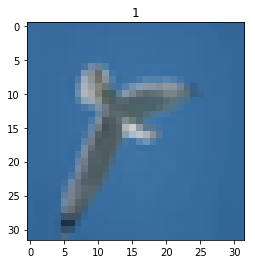

In [0]:
i = 8
rgb = x_test[i] #Visualize image and label
plt.imshow(rgb)
plt.title(int(y_test1[i]))
print(predicted[i])